# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Valerie Johnson
### GitHub Repository: https://github.com/Valpal84/WK6_webscraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [4]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list
print('All prereqs installed')

Package                   Version
------------------------- ------------
annotated-types           0.7.0
anyio                     4.0.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.2.3
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.12.1
backcall                  0.2.0
beautifulsoup4            4.12.2
black                     23.9.1
bleach                    6.0.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2023.7.22
cffi                      1.15.1
charset-normalizer        3.2.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.0
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.8
decorator                 5.1.1
defusedxml       


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Question 1: Extract an article from a website and dump it to an appropriate file

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [5]:
# Fetch article in html
article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text


# Check the status of the fetch
print(article_page.status_code)
print(article_page.headers['content-type'])

# Create a pickle file from fetched html

with open('laser_head.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

with open('laser_head.pkl', 'rb') as f:
    article_html = pickle.load(f)
    

200
text/html; charset=UTF-8


Question 2: Read in file and print text

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [6]:
# Read in article
parser = 'html.parser'
soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')

# Print the article content
print(article_element.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

Question 3: Determine 5 most frequent tokens with removing unnecessary object

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [7]:
# Import spaCytextblob
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load text into a spaCy pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

# Determine the five most frequent tokens and their counts
tokens = [token.text for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
counting_tokens = Counter(tokens)
freq_tokens = counting_tokens.most_common(5)

# Print the results of the count with appropriate labels-I'm adding a bold title with green.
print("\033[1m\033[32mTop Five Most Frequent Tokens\033[0m")
for token, freq in freq_tokens:
    print(f"Token: {token}, Frequency: {freq}")

# Print all the tokens and their frequencies
print("\033[1m\033[32mTokens And Their Frequencies\033[0m")
for token, freq in counting_tokens.items():
    print(f"Token: {token}, Frequency: {freq}")
    




Top Five Most Frequent Tokens
Token: laser, Frequency: 29
Token: headlights, Frequency: 17
Token: technology, Frequency: 10
Token: headlight, Frequency: 10
Token: LED, Frequency: 10
Tokens And Their Frequencies
Token: Laser, Frequency: 6
Token: Headlights, Frequency: 2
Token: Work, Frequency: 1
Token: 130, Frequency: 1
Token: Comments, Frequency: 1
Token: Lewin, Frequency: 1
Token: Day, Frequency: 1
Token: March, Frequency: 1
Token: 22, Frequency: 1
Token: 2021, Frequency: 1
Token: think, Frequency: 1
Token: onward, Frequency: 1
Token: march, Frequency: 1
Token: automotive, Frequency: 6
Token: technology, Frequency: 10
Token: headlights, Frequency: 17
Token: usually, Frequency: 1
Token: thing, Frequency: 2
Token: come, Frequency: 5
Token: mind, Frequency: 3
Token: Engines, Frequency: 1
Token: fuel, Frequency: 1
Token: efficiency, Frequency: 3
Token: switch, Frequency: 2
Token: electric, Frequency: 1
Token: power, Frequency: 3
Token: mean, Frequency: 1
Token: thousands, Frequency: 1
Tok

### Question 4: Determine 5 most frequest lemmas with labels

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [8]:
# Filter out the unnecessary lemmas and convert to lower case
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
lemma_counts = Counter(lemmas)
top_lemmas = lemma_counts.most_common(5)

# Print the results of the top 5 most frequent lemmas with appropriate labels. I added a bold heading with green.
print("\033[1m\033[32mTop Five Most Common Lemmas With Frequency\033[0m")
for lemma, freq in top_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")


Top Five Most Common Lemmas With Frequency
Lemma: laser, Frequency: 40
Lemma: headlight, Frequency: 28
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 10
Lemma: led, Frequency: 10


## Question 5: 

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [25]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Define scoring a sentence via tokens
def score_sentence_by_token(sentence, interesting_tokens):
    # Process the sentence with spaCy
    doc = nlp(sentence.lower())
    
    # Count the interesting tokens
    token_count = sum(1 for token in doc if token.text in interesting_tokens)
    
    # Get the sentence length
    total_words = len([token for token in doc if not token.is_punct and not token.is_space])
    
    # Return the ratio
    if total_words > 0:
        return token_count / total_words
    else:
        return 0

# Define the method to score a sentence based on interesting lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence with spaCy
    doc = nlp(sentence.lower())
    
    # Count interesting lemmas
    lemma_count = sum(1 for token in doc if token.lemma_ in interesting_lemmas)
    
    # Get the total number of words in the sentence not including punctuation and white spaces
    total_words = len([token for token in doc if not token.is_punct and not token.is_space])
    
    # Return the ratio: number of interesting lemmas divided by total words
    if total_words > 0:
        return lemma_count / total_words
    else:
        return 0



# Identify the frequent tokens
frequent_tokens = ['laser', 'headlights', 'technology', 'headlight', 'LED']

# Identify the frequent lemmas
frequent_lemmas = ['laser', 'headlight', 'beam', 'technology', 'led']

# Identify the first sentence from the article given
first_sentence = "Laser headlights are a new and exciting technology in automotive lighting."


# Score the first sentence based on frequent tokens
token_score = score_sentence_by_token(first_sentence, frequent_tokens)
#Round token score
token_score_rounded = round(token_score, 2)
print(f"First sentence score for tokens: {token_score_rounded}")

# Score the first sentence based on frequent lemmas
lemma_score = score_sentence_by_lemma(first_sentence, frequent_lemmas)
# Round lemma score
lemma_score_rounded = round(lemma_score, 2)
print(f"First sentence score for lemmas: {lemma_score_rounded}")

First sentence score for tokens: 0.27
First sentence score for lemmas: 0.27


## Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

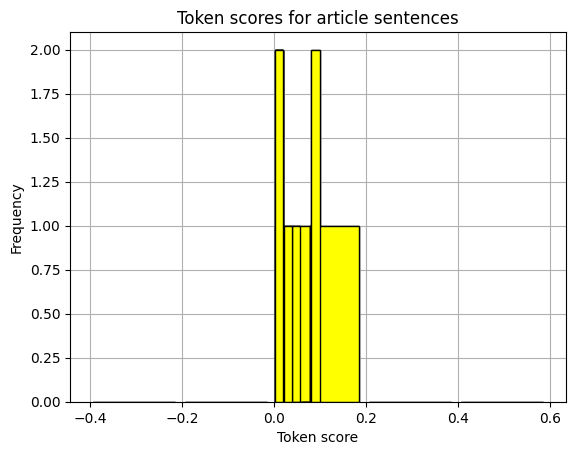

In [ ]:

# Imports
import spacy
import matplotlib.pyplot as plt

# Load spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text
article_text = """When we think about the onward march of automotive technology, 
headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, 
and the switch to electric power are all more front of mind. However, that doesn’t mean
 there aren’t thousands of engineers around the world working to improve the state 
 of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, 
while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. 
Now, a new technology is on the scene, with lasers!"""

doc = nlp(article_text)

#Define score sentence by token using interesting tokens and no punctuation or white space
def score_sentence_by_token(sentence, interesting_tokens):
    doc =nlp(sentence.lower())
    # Count the interesting tokens in the sentences
    token_count = sum(1 for token in doc if token.text in interesting_tokens)
    # Get total number of words in the sentence
    total_words = len([token for token in doc if not token.is_punct and not token.is_space])

    #Create code to determine ratios of interesting tokens by total words
    if total_words > 0:
        return token_count / total_words
    else:
        return 0
    
#Create list to store sentence scores
sentence_scores = []

# Create a loop to run through the different sentences and create a score for each
for sent in doc.sents:
    score = score_sentence_by_token(sent.text, interesting_tokens)
    sentence_scores.append(score)


    #Create a histogram to plot the different token scores
    plt.hist(sentence_scores, bins=5, color='yellow', edgecolor='black', rwidth=0.9)
    #Change the grid to go behind the bars
    plt.grid(True, zorder=0)
    #Ensure bars are in front of the gridlines
    plt.hist(sentence_scores, bins=5, color='yellow', edgecolor='black', rwidth=0.9, zorder=2)
    # Add title to histogram
    plt.title('Token scores for article sentences')
    # Add label to x axis
    plt.xlabel('Token score')
    # Add label to y axis
    plt.ylabel('Frequency')
    #Display histogram
    plt.show

   #All scores are between zero and two, with the majority of them being around one



7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

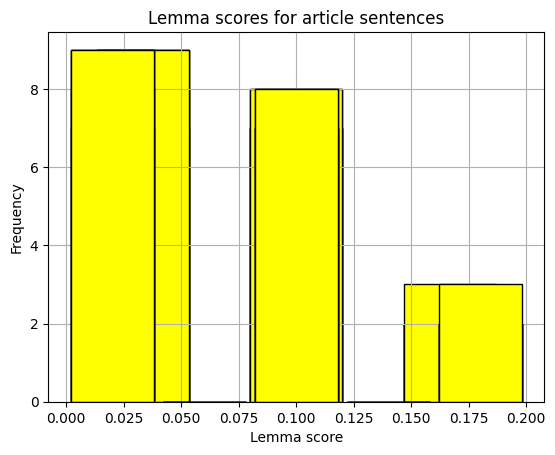

In [ ]:
# Imports
import spacy
import matplotlib.pyplot as plt

# Load spaCy
nlp = spacy.load("en_core_web_sm")

# Process the article text
article_text = """When we think about the onward march of automotive technology, 
headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, 
and the switch to electric power are all more front of mind. However, that doesn’t mean
 there aren’t thousands of engineers around the world working to improve the state 
 of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, 
while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. 
Now, a new technology is on the scene, with lasers!"""

doc = nlp(article_text)

#Define score sentence by token using interesting lemmas and no punctuation or white space
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc =nlp(sentence.lower())
    # Count the interesting lemmas in the sentences
    lemma_count = sum(1 for token in doc if token.lemma_ in interesting_lemmas)
    # Get total number of words in the sentence
    total_words = len([token for token in doc if not token.is_punct and not token.is_space])

    #Create code to determine ratios of interesting lemmas by total words
    if total_words > 0:
        return lemma_count / total_words
    else:
        return 0
    
#Create list to store sentence scores
sentence_scores_lemma = []

# Create a loop to run through the different sentences and create a score for each
for sent in doc.sents:
    score = score_sentence_by_lemma(sent.text, interesting_lemmas)
    sentence_scores.append(score)


    #Create a histogram to plot the different token scores
    plt.hist(sentence_scores, bins=3, color='yellow', edgecolor='black', rwidth=0.6)
    #Change the grid to go behind the bars
    plt.grid(True, zorder=0)
    #Ensure bars are in front of the gridlines
    plt.hist(sentence_scores, bins=5, color='yellow', edgecolor='black', rwidth=0.9, zorder=2)
    # Add title to histogram
    plt.title('Lemma scores for article sentences')
    # Add label to x axis
    plt.xlabel('Lemma score')
    # Add label to y axis
    plt.ylabel('Frequency')
    #Display histogram
    plt.show

   # All scores are between 0 and 0.2, with what appears to be three large sets. 
   # The first set is between 0-0.05, the second set is between 0.075-0.125, and the third
   # set is between 0.150-0.2.

### Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

 - The tokens that would have been omitted from question 3 would have been: After running the revamped code to look for nouns, the token LED has been removed and replaced by beam.

 - The lexems that would have been omitted from question 4 would have been: After running the modified code to look for nouns, the lemmas are all the same as in the original question 4. 

 - In order to consider only nouns, we would have had to change the code to:
     - For tokens the I would write the code as:
     interesting_tokens = [
    token.text for token in doc
    if token.pos_ == "NOUN" and not token.is_punct and not token.is_space
]
     - For lemmas I would write the code as: lemmas = [
    token.lemma_.lower() for token in doc
    if token.pos_ == "NOUN" and not token.is_punct and not token.is_space
]
     




### Trying out codes to get only token nouns

In [50]:
# Import spaCytextblob
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load text into a spaCy pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

# Determine the five most frequent tokens and their counts
interesting_tokens = [
    token.text for token in doc
    if token.pos_ == "NOUN" and not token.is_punct and not token.is_space
]
counting_tokens = Counter(interesting_tokens)
freq_tokens = counting_tokens.most_common(5)

# Print the results of the count with appropriate labels-I'm adding a bold title with green.
print("\033[1m\033[32mTop Five Most Frequent Tokens That Are Nouns\033[0m")
for interesting_tokens, freq in freq_tokens:
    print(f"Token: {interesting_tokens}, Frequency: {freq}")

Top Five Most Frequent Tokens That Are Nouns
Token: laser, Frequency: 29
Token: headlights, Frequency: 17
Token: technology, Frequency: 10
Token: headlight, Frequency: 9
Token: beam, Frequency: 7


### Trying out code to get only lemma nouns

In [52]:
# Filter out the unnecessary lemmas and convert to lower case
lemmas = [
    token.lemma_.lower() for token in doc
    if token.pos_ == "NOUN" and not token.is_punct and not token.is_space
]
lemma_counts = Counter(lemmas)
top_lemmas = lemma_counts.most_common(5)

# Print the results of the top 5 most frequent lemmas with appropriate labels. I added a bold heading with green.
print("\033[1m\033[32mTop Five Most Common Noun Lemmas With Frequency\033[0m")
for lemma, freq in top_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")


Top Five Most Common Noun Lemmas With Frequency
Lemma: laser, Frequency: 34
Lemma: headlight, Frequency: 26
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 10
Lemma: led, Frequency: 8


### Convert notebook to html document 

In [53]:
!jupyter nbconvert --html web_Scraping.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | Unrecognized alias: 'html', it will have no effect.
